In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns 

In [2]:
import pandas as pd
import numpy as np
#1. Reading & displaying the data 
import pandas as pd
df = pd.read_csv('data2.csv', delimiter = ',')
display(df)

,0,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores
0,1,20.84,51.96,45.72,45.53,34.60
1,2,22.39,54.07,55.71,41.56,44.16
2,3,23.75,57.80,42.42,65.82,49.34
3,4,9.70,45.27,44.58,58.71,40.88
4,5,11.85,44.53,46.97,40.71,47.39
...,...,...,...,...,...,...
95,96,13.79,41.46,38.77,59.79,41.17
96,97,24.53,55.03,45.86,50.61,31.78
97,98,31.30,56.55,49.66,58.17,45.59
98,99,20.70,39.71,38.69,47.48,39.68


In [3]:
## WE WILL assighn each 5 people in a team randomly,

num_teams = 20
num_people_per_team = 5
team_numbers = np.random.randint(1, num_teams + 1, size=len(df))
df['Team number'] = team_numbers

# Print the first few rows to check the result
print(df.head())

   0  neuroticism_scores  extroversion_scores  openness_scores  \
0  1               20.84                51.96            45.72   
1  2               22.39                54.07            55.71   
2  3               23.75                57.80            42.42   
3  4                9.70                45.27            44.58   
4  5               11.85                44.53            46.97   

   agreeableness_scores  conscientiousness_scores  Team number  
0                 45.53                     34.60            5  
1                 41.56                     44.16            4  
2                 65.82                     49.34            7  
3                 58.71                     40.88            9  
4                 40.71                     47.39            7  


In [4]:
df = df.drop(df.columns[0], axis=1)
display(df.head(5))
display(df.info())
df["Team number"]

,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number
0,20.84,51.96,45.72,45.53,34.60,5
1,22.39,54.07,55.71,41.56,44.16,4
2,23.75,57.80,42.42,65.82,49.34,7
3,9.70,45.27,44.58,58.71,40.88,9
4,11.85,44.53,46.97,40.71,47.39,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   neuroticism_scores        100 non-null    float64
 1   extroversion_scores       100 non-null    float64
 2   openness_scores           100 non-null    float64
 3   agreeableness_scores      100 non-null    float64
 4   conscientiousness_scores  100 non-null    float64
 5   Team number               100 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 4.4 KB


None

0      5
1      4
2      7
3      9
4      7
      ..
95     5
96    10
97    17
98    17
99     8
Name: Team number, Length: 100, dtype: int32

In [5]:
target_average = 70  # You can specify the desired average score

# Function to generate team scores with the desired average
def generate_team_score(target_average, team_size):
    total = target_average * team_size
    min_score = max(0, total - 100 * (team_size - 1))
    max_score = min(100, total)
    return random.randint(min_score, max_score)

# Create a new column with team scores
team_scores = {}
for team_number, team_data in df.groupby('Team number'):
    team_size = len(team_data)
    team_scores[team_number] = generate_team_score(target_average, team_size)

df['Team Score'] = df['Team number'].map(team_scores)

In [6]:
df


,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number,Team Score
0,20.84,51.96,45.72,45.53,34.60,5,75
1,22.39,54.07,55.71,41.56,44.16,4,67
2,23.75,57.80,42.42,65.82,49.34,7,25
3,9.70,45.27,44.58,58.71,40.88,9,46
4,11.85,44.53,46.97,40.71,47.39,7,25
...,...,...,...,...,...,...,...
95,13.79,41.46,38.77,59.79,41.17,5,75
96,24.53,55.03,45.86,50.61,31.78,10,93
97,31.30,56.55,49.66,58.17,45.59,17,40
98,20.70,39.71,38.69,47.48,39.68,17,40


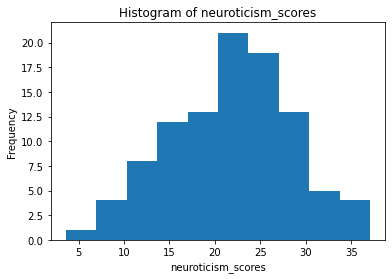

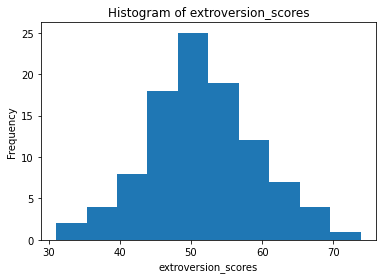

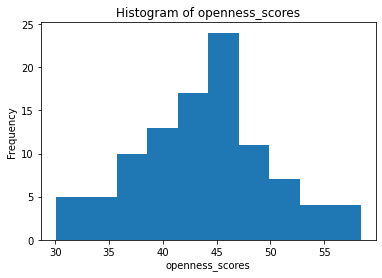

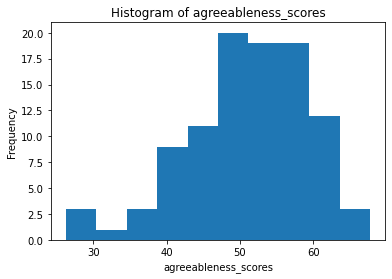

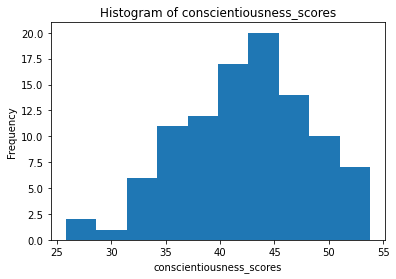

In [7]:

numerical_cols = df.select_dtypes(include=['number']).drop(columns={'Team number',"Team Score"}).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Visualize statistics for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df[col].plot(kind='hist', title=f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize statistics for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', title=f'Bar plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()






In [8]:
# Calculate mean and standard deviation for each BIG 5 score
mean_neuroticism = df['neuroticism_scores'].mean()
std_neuroticism = df['neuroticism_scores'].std()

mean_extroversion = df['extroversion_scores'].mean()
std_extroversion = df['extroversion_scores'].std()

mean_openness = df['openness_scores'].mean()
std_openness = df['openness_scores'].std()

mean_agreeableness = df['agreeableness_scores'].mean()
std_agreeableness = df['agreeableness_scores'].std()

mean_conscientiousness = df['conscientiousness_scores'].mean()
std_conscientiousness = df['conscientiousness_scores'].std()

# Print the statistics
print(f"Neuroticism - Mean: {mean_neuroticism}, Std Dev: {std_neuroticism}")
print(f"Extroversion - Mean: {mean_extroversion}, Std Dev: {std_extroversion}")
print(f"Openness - Mean: {mean_openness}, Std Dev: {std_openness}")
print(f"Agreeableness - Mean: {mean_agreeableness}, Std Dev: {std_agreeableness}")
print(f"Conscientiousness - Mean: {mean_conscientiousness}, Std Dev: {std_conscientiousness}")


Neuroticism - Mean: 21.7447, Std Dev: 6.89130215297779
Extroversion - Mean: 51.44660000000002, Std Dev: 7.865300500273079
Openness - Mean: 43.8503, Std Dev: 6.024461995343097
Agreeableness - Mean: 51.1159, Std Dev: 8.316578926481974
Conscientiousness - Mean: 42.3178, Std Dev: 5.83973442387701


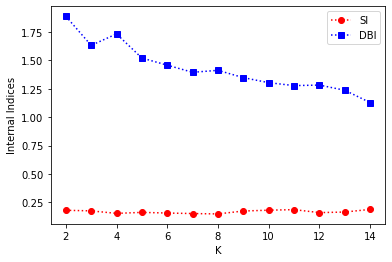

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# Set possible values for K
k_vals=range(2,15)

# Empty arrays for internal measures
sShil_max = np.empty([len(k_vals),1])
sDaBo_min = np.empty_like(sShil_max)

for i,n in enumerate(k_vals):
    kmeans = KMeans(n_clusters=n, max_iter=1000, n_init=10, random_state=0).fit(df[numerical_cols])
    sShil_max[i] = metrics.silhouette_score(df[numerical_cols],kmeans.labels_)
    sDaBo_min[i] = metrics.davies_bouldin_score(df[numerical_cols],kmeans.labels_) 
    
plt.plot(k_vals, sShil_max, 'o:',c='r')
plt.plot(k_vals, sDaBo_min, 's:',c='b')
plt.xlabel("K")
plt.ylabel("Internal Indices")
plt.legend(['SI','DBI'])
plt.show()

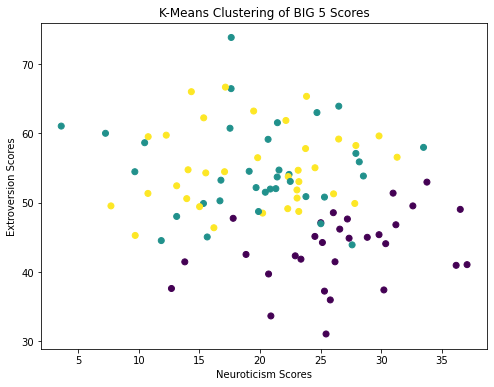

    neuroticism_scores  extroversion_scores  openness_scores  \
0                20.84                51.96            45.72   
1                22.39                54.07            55.71   
2                23.75                57.80            42.42   
3                 9.70                45.27            44.58   
4                11.85                44.53            46.97   
..                 ...                  ...              ...   
95               13.79                41.46            38.77   
96               24.53                55.03            45.86   
97               31.30                56.55            49.66   
98               20.70                39.71            38.69   
99               21.30                52.02            50.26   

    agreeableness_scores  conscientiousness_scores  Team number  Team Score  \
0                  45.53                     34.60            5          75   
1                  41.56                     44.16            4          

In [10]:


# Specify the number of clusters (k=3)
kmeans = KMeans(n_clusters=3)

# Fit the k-means model to the BIG 5 scores
kmeans.fit(df[['neuroticism_scores', 'extroversion_scores', 'openness_scores', 'agreeableness_scores', 'conscientiousness_scores']])

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['neuroticism_scores'], df['extroversion_scores'], c=df['cluster'], cmap='viridis')
plt.xlabel('Neuroticism Scores')
plt.ylabel('Extroversion Scores')
plt.title('K-Means Clustering of BIG 5 Scores')
plt.show()

# Display the DataFrame with cluster labels
print(df)

In [11]:
df

,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number,Team Score,cluster
0,20.84,51.96,45.72,45.53,34.60,5,75,1
1,22.39,54.07,55.71,41.56,44.16,4,67,1
2,23.75,57.80,42.42,65.82,49.34,7,25,2
3,9.70,45.27,44.58,58.71,40.88,9,46,2
4,11.85,44.53,46.97,40.71,47.39,7,25,1
...,...,...,...,...,...,...,...,...
95,13.79,41.46,38.77,59.79,41.17,5,75,0
96,24.53,55.03,45.86,50.61,31.78,10,93,2
97,31.30,56.55,49.66,58.17,45.59,17,40,2
98,20.70,39.71,38.69,47.48,39.68,17,40,0


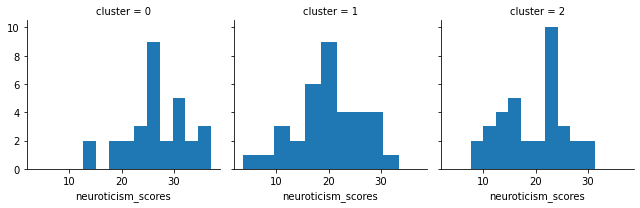

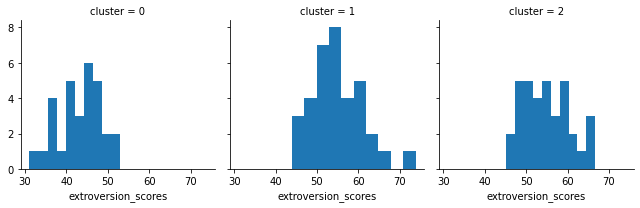

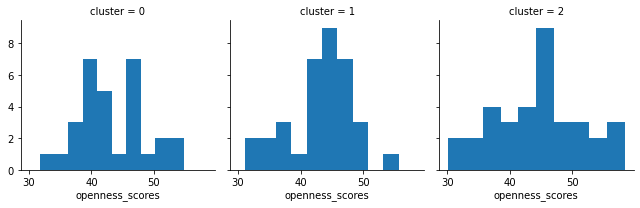

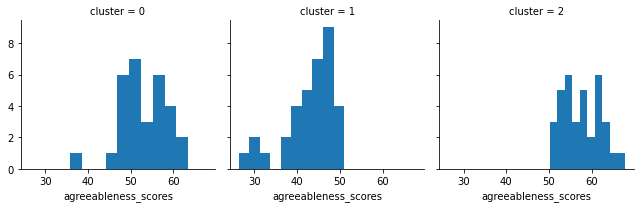

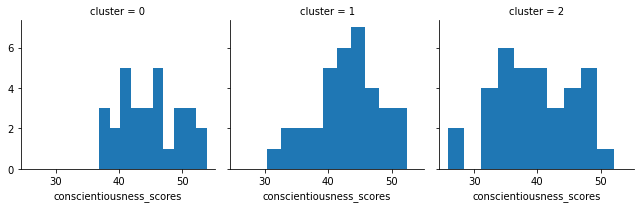

In [12]:
for c in df[numerical_cols]:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

<Figure size 432x288 with 0 Axes>

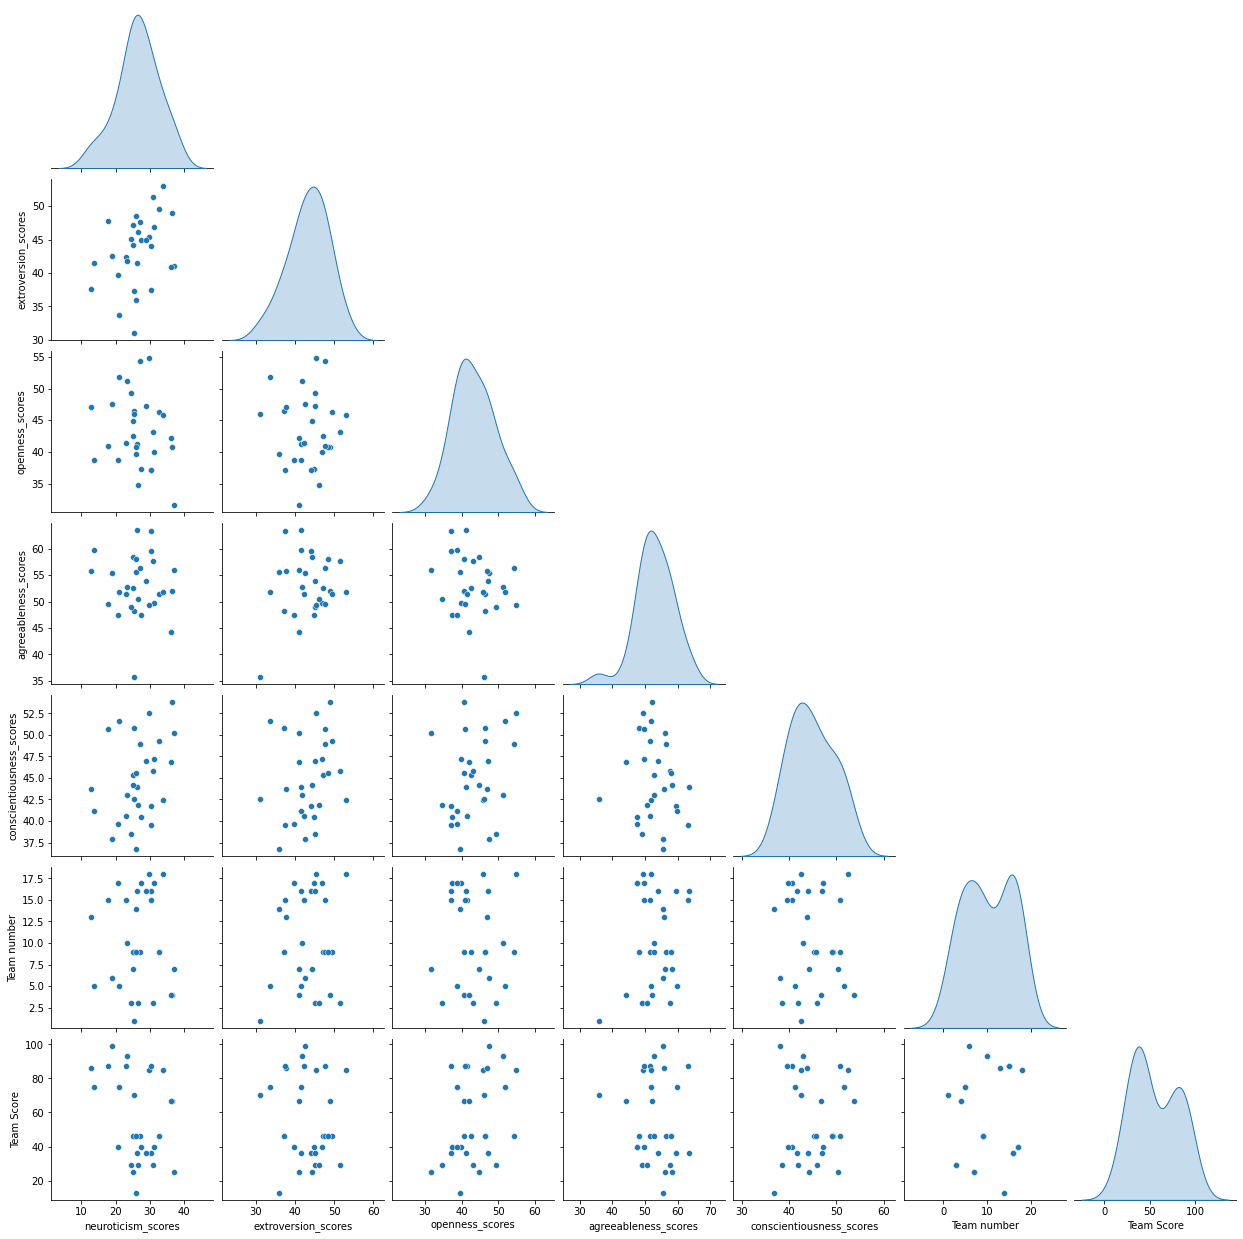

In [13]:
plt.figure()
sns.pairplot(vars=df.columns.drop('cluster'), 
             corner=True,diag_kind='kde',
             data=df[df['cluster']==0])
plt.show()